/home/dtrejoz/Documents/Python/ChemProject/PytChem



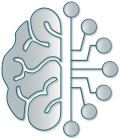

**Start at:** Friday 19 January 2024, 16:37:07  
**Hostname:** Dulce-ASUS-mint (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

In [1]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4pyPhysChem as t4pPC

# The renaissance of 2nd-order NMR: a model hamiltonian-based rationalization of benchtop NMR spectra

## Introduction to benchtop NMR and simple refresher on NMR

### Benchtop NMR

#### Benchtop NMR *vs.* "usual" high field NMR spectrometer

<div class="intro">
    
<img src="./Misc-Slides/NMR/Slides-BenchtopNMR-01.jpg" alt="NMR1" width="1200" style="display: block; margin: 0 auto; align:center"/> 
</div>

#### Interest of benchtop NMR

<div class="intro">

- Benchtop NMR spectrometers are utilized for various applications in chemistry, biochemistry, food science, materials science, and other fields

- The lower field strength may limit the resolution and sensitivity compared to high-field NMR

- But benchtop NMR devices offer advantages such as portability, ease of use, and accessibility for routine analyses and educational purposes

- Used for tasks like chemical reaction monitoring, quality control in industries, studying molecular structures of small organic molecules, quantifying components in mixtures
</div>

#### Sensitivity of benchtop NMR

<div class="intro">

- Sensitivity can be an issue 

- The sensitivity of an NMR instrument determines its ability to detect and resolve signals from a sample, which directly affects the quality of the acquired spectrum

- Benchtop NMR instruments might struggle to detect low concentrations of certain compounds

- Fortunately, improvements in magnets, electronics, and methodologies continue to enhance benchtop NMR sensitivity

- The quality and homogeneity of the magnetic field is key

<img src="./Misc-Slides/NMR/Figures/SignalAsAFunctionOfB0.png" alt="SignalB0" width="600" style="display: block; margin: 0 auto; align:center"/> 

- A good signal sensitivity allows the detection of low concentration samples, with an adapted acquisition time 

<img src="./Misc-Slides/NMR/Figures/Lidocaine.png" alt="Lidocaine" width="800" style="display: block; margin: 0 auto; align:center"/> 
</div>

### Simple refresher on 1H NMR

#### Proton in a magnetic field, nuclear Zeeman splitting and Larmor frequency, spin-spin coupling

<div class="intro">
    
<img src="./Misc-Slides/NMR/Slides-BenchtopNMR-04.jpg" alt="NMR4" width="1200" style="display: block; margin: 0 auto; align:center"/> 
</div>
<br>
<div class="rqT" title="Start reading the technical paper, sections 1.1 to 1.3">

It's time to start reading the [technical paper](./MiscPDF/NMR-TechnicalPaper-v3.pdf) on the quantum context of the interaction of half-spin nuclei with magnetic fields and the interactions between nuclear spins. **Don't be afraid**. It will be introduced step-by-step in the present notebook. You will discover that such proposed spin hamiltonian description turns out to be crucial in understanding and modeling the so-called **higher-order effects** in NMR spectroscopy, which appear given to the weak magnetic fields of benchtop NMR spectrometers. 

**<u>There is no need to use SymPy to solve the exercises of this part. Use only matplotlib and NumPy</u>**
</div>

<div class="exE" title="Gyromagnetic ratio and other constants">

Import the proton gyromagnetic ratio, Planck constant and reduced Planck constant from `scipy.constant`. Name them `_gamH`, `_h` and `_hbar`. Print their value as well as their unit and their uncertainty.

</div>

In [2]:
# insert your code below

import scipy.constants as sc
import numpy as np
import math

_gamH = sc.value("proton gyromag. ratio")
_h = sc.value("Planck constant")
_hbar = sc.value("reduced Planck constant")

# Define formatting variables
BOLD = '\033[1m'  # ANSI escape code for bold text
OFF = '\033[0m'   # ANSI escape code to turn off formatting

#Separted by comas, first printed is the value, second the units and last the uncertainty.
print(f'{BOLD}Proton Gyromagnetic Ratio:{OFF} {sc.physical_constants["proton gyromag. ratio"]}')
print(f'{BOLD}Planck constant:{OFF} {sc.physical_constants["Planck constant"]}')
print(f'{BOLD}Reduced Planck constant:{OFF} {sc.physical_constants["reduced Planck constant"]}')

Proton Gyromagnetic Ratio: (267522187.44, 's^-1 T^-1', 0.11)
Planck constant: (6.62607015e-34, 'J Hz^-1', 0.0)
Reduced Planck constant: (1.054571817e-34, 'J s', 0.0)


<div class="exE" title="Absolute resonance frequency">
    
1. define a `nu_0(_B0)` function that will return the absolute resonance frequency for the proton, *ν*<sub>0</sub> (in MHz) as a function of the applied magnetic field, *B*<sub>0</sub> (in Tesla)

2. calculate *ν*<sub>0</sub> for a 1.88 T permanent magnet and a 18.8 T superconducting magnet. Comment on this result in the "comment" markdown cell.

</div>

In [3]:
# Calculating absoulte resonace frequency
def nu_0(B0):
    _gamH = sc.value("proton gyromag. ratio in MHz/T")  #as its retrieved in MHz/T, it's  already divided by 2\pi
    return _gamH * B0

# Storing given magnetic fields in different variables
B0_permanent_magnet = 1.88  # in Tesla
B0_superconducting_magnet = 18.8  # in Tesla

# Calculate resonance frequencies for each B
resonance_frequency_permanent_magnet = nu_0(B0_permanent_magnet)
resonance_frequency_superconducting_magnet = nu_0(B0_superconducting_magnet)

# Print the results
print(f"Resonance frequency for a 1.88 T permanent magnet: {resonance_frequency_permanent_magnet} MHz")
print(f"Resonance frequency for an 18.8 T superconducting magnet: {resonance_frequency_superconducting_magnet} MHz")


Resonance frequency for a 1.88 T permanent magnet: 80.04565961384 MHz
Resonance frequency for an 18.8 T superconducting magnet: 800.4565961384001 MHz


<div class="exE" title="Nuclear Zeeman splitting of a proton in a magnetic field">

    
1. define a `Zeeman_E(_mI,_B0)` function that will return the Zeeman energy (in J) of a nucleus with magnetic quantum number  *m<sub>I</sub>* as a function of the applied magnetic field, *B*<sub>0</sub> (in Tesla). Under an external magnetic field *B*<sub>0</sub>, the energy *E*(*m<sub>I</sub>*, *B*<sub>0</sub>) of a quantum particle with a spin projection *m<sub>I</sub>* on the axis of  *B*<sub>0</sub>  is given by

$$E = -m_I  \hbar \gamma_H B_0$$

(see also equations (10) or (11) of the  [technical paper](./MiscPDF/NMR-TechnicalPaper-v3.pdf))

2. calculate the Zeeman energy splitting, Δ*E* (in J) for protons under an external magnetic field *B*<sub>0</sub> = 1.88 T and 18.8 T

3. calculate for each magnetic field the resonance transition frequency between the levels, in MHz. Comment on this result in the "comment" markdown cell. 

</div>

In [4]:
# insert your code here

def Zeeman_E(_mI, B0):
    return _mI * _hbar * _gamH * B0

# Given magnetic fields
B0_permanent_magnet = 1.88  # in Tesla
B0_superconducting_magnet = 18.8  # in Tesla

# Magnetic quantum numbers for protons (assuming spin +-1/2)
mI_1 = 1/2
mI_2 = -1/2

# Calculate Zeeman energy for the two magnetic quantum numbers and magnetic fields
zeeman_energy_1 = Zeeman_E(mI_1, B0_permanent_magnet)
zeeman_energy_2 = Zeeman_E(mI_2, B0_permanent_magnet)

# Calculate Zeeman energy splitting (Delta E)
delta_E_permanent_magnet = abs(zeeman_energy_1 - zeeman_energy_2)

# Repeat for the superconducting magnet
zeeman_energy_1_superconducting = Zeeman_E(mI_1, B0_superconducting_magnet)
zeeman_energy_2_superconducting = Zeeman_E(mI_2, B0_superconducting_magnet)

delta_E_superconducting_magnet = abs(zeeman_energy_1_superconducting - zeeman_energy_2_superconducting)

# Print the results
print(f"Zeeman energy splitting for a 1.88 T permanent magnet: {delta_E_permanent_magnet:.3g} Joules")
print(f"Zeeman energy splitting for an 18.8 T superconducting magnet: {delta_E_superconducting_magnet:.3g} Joules\n")


# Calculate resonance transition frequencies for the permanent magnet
resonance_frequency_permanent_magnet = delta_E_permanent_magnet / (_h * 1e6)  # Convert Hz to MHz

# Repeat for the superconducting magnet
resonance_frequency_superconducting_magnet = delta_E_superconducting_magnet / (_h * 1e6)  # Convert Hz to MHz; E = hv

# Print the results
print(f"Resonance transition frequency for a 1.88 T permanent magnet: {resonance_frequency_permanent_magnet:.2f} MHz")
print(f"Resonance transition frequency for an 18.8 T superconducting magnet: {resonance_frequency_superconducting_magnet:.2f} MHz")


Zeeman energy splitting for a 1.88 T permanent magnet: 5.3e-26 Joules
Zeeman energy splitting for an 18.8 T superconducting magnet: 5.3e-25 Joules

Resonance transition frequency for a 1.88 T permanent magnet: 80.05 MHz
Resonance transition frequency for an 18.8 T superconducting magnet: 800.46 MHz


<div class="com">
When a transition between energy levels occurs, its value is proportional to the magnetic field applied, which is consistent with the equation used before to calculate $\nu_0$. Therefore the resonance transition frequency increases with an increasing applied magnetic field.

</div>

#### Protons in a chemical environment: chemical shift, chemical shielding, spin-spin coupling

<div class="intro">
    
<img src="./Misc-Slides/NMR/Slides-BenchtopNMR-05.jpg" alt="NMR5" width="1200" style="display: block; margin: 0 auto; align:center"/>  
</div>
<br>
<div class="intro">

And, of course:
- integration in the spectrum provides the relative abundance of protons represented by each peak

- by interpreting these peaks, chemists can deduce the structure, connectivity, and environment of molecules, making proton NMR a powerful tool in chemical analysis and structure determination
 
</div>

<div class="exE" title="Frequency ↔ chemical shift relationships, Larmor frequency">

Later on, it might be useful to have functions that make conversions between resonance frequencies *ν*, in MHz, and chemical shifts *δ*, in ppm. 

$$\delta_i\mathrm{(ppm)} = \frac{\nu_i - \nu_\mathrm{ref}}{\nu_\mathrm{ref}} \times 10^6$$

where $\nu_\mathrm{ref}$ is the frequency of a reference compound, such as TMS.

With $\nu_0$, the operating frequency of the spectrometer employed, defined as the origin of the frequency scale, the previous equation becomes

$$\delta_i\mathrm{(ppm)} = \frac{\nu_i - \nu_0}{\nu_0} \times 10^6$$

1. Analyze what each of the following four functions is supposed to do. Copy/paste the functions in the next Code cell and replace the `enter_your_code` field with the appropriate code.

```python
def delta_i(nu_i, nu_ref):
    '''
    Function that converts a resonance frequency of a proton i into a chemical shift

    Input:
    nu_i = resonance frequency of nucleus i in MHz
    nu_ref = resonance frequency of a reference (eg TMS), in MHz

    Output:
    chemical shift, in ppm
    '''
    return enter_your_code

def nu_i(delta_i, nu0):
    '''
    Function that converts a chemical shift into an absolute resonance frequency

    Input:
        delta_i = chemical shift to convert, in ppm
        nu0 = resonance frequency of the spectrometer, in MHz

    Output:
        absolute resonance frequency nu_i, in MHz
    '''
    return enter_your_code

def nu_i_rel(delta_i, nu0):
    '''
    Function that converts a chemical shift into a relative resonance frequency, i.e. nu_i - nu0

    Input:
        delta_i = chemical shift to convert, in ppm
        nu0 = resonance frequency of the spectrometer, in MHz

    Output:
        relative resonance frequency, in Hz
    '''
    return enter_your_code

def delta_i_rel(nu_i_rel,nu0):
    '''
    Function that converts a relative resonance frequency (nu_i - nu0) into a chemical shift

    Input:
        nu_i_rel = relative resonance frequency, in Hz
        nu0 = resonance frequency of the spectrometer, in MHz

    Output:
        chemical shift, in ppm
    '''
    return enter_your_code
```

<br>

2. Let's remind as well that the Larmor frequency for a proton in chemical environment is:

$$\nu_{\mathrm{L}}(i)=\frac{\gamma_{\mathrm{H}}B_{0}}{2\pi}(1-\sigma_{i})$$

Complete the functions with a `LarmorFreq(B0,sigma)` function that will return the Larmor frequency (in MHz) of a proton in interaction with a *B*<sub>0</sub> external magnetic field (in Tesla), and which has a chemical shielding *σ* (in ppm). Apply the function for *B*<sub>0</sub> = 1.88 T and *σ* = 0 ppm.

3. The resonance of protons of a reference compound, e.g. TMS, are set up as an internal reference of the NMR spectrometer, *i.e.* they are set up to lie at 0 ppm, as the origin of the chemical shift scale. A sample recorded on a 80 MHz spectrometer exhibits a single resonance at 581.60 Hz from the TMS resonance. The signal is observed at 5816.00 Hz from TMS on a 800 MHz spectrometer. Calculate in each case the chemical shift corresponding to the observed resonance. Comment on this result.

4. At which frequency from TMS would be observed the same signal on a 600 MHz spectrometer? What would be its absolute resonance frequency?
</div>

In [5]:
# Question 1
def delta_i(nu_i, nu_ref):
    # Convert the resonance frequency of compound i to chemical shift using the frequency of a reference compound
    return (nu_i - nu_ref) / nu_ref * 1e6

def nu_i(delta_i, nu0):
    # Convert chemical shift to absolute resonance frequency
    return (((delta_i * nu0) / 1e6) + nu0)/1e6

def nu_i_rel(delta_i, nu0):
    # Convert chemical shift to relative resonance frequency
    return (delta_i * nu0) / 1e6

def delta_i_rel(nu_i_rel, nu0):
    # Convert relative resonance frequency to chemical shift
    return nu_i_rel / nu0 * 1e6

def LarmorFreq(B0, sigma):
    # Gyromagnetic ratio for protons (in MHz/T)
    _gamH = sc.value("proton gyromag. ratio in MHz/T")  #As expressed in MHz/T, it already is divided by 2\pi

    # Calculate Larmor frequency using the formula
    return (_gamH * B0) * (1 - sigma ) #Result in MHz as the constant is retrieved in that unit

# Question 2

# Given values
B0_value = 1.88  # in Tesla
sigma_value = 0  # in ppm

# Calculate Larmor frequency using the function
larmor_frequency_result = LarmorFreq(B0_value, sigma_value)

# Print the result
print(f"Larmor frequency for B0 = {B0_value} T and sigma = {sigma_value} ppm is: {larmor_frequency_result} MHz")


Larmor frequency for B0 = 1.88 T and sigma = 0 ppm is: 80.04565961384 MHz


In [6]:
# Question 3
# Given values are relative frequencies because they are at a given distance from TMS.
nu_rel_1 = 581.60   # in Hz
nu_rel_2 = 5816.00  # in Hz

nu_ref_1 = 80 * 1e6  # in Hz
nu_ref_2 = 800 * 1e6 # in Hz

# Calculate chemical shifts using our previously defined function delta_i_rel(nu_i_rel,nu0):
delta_1 = delta_i_rel(nu_rel_1, nu_ref_1)
delta_2 = delta_i_rel(nu_rel_2, nu_ref_2)

# Print the results
print(f"Chemical shift for the 80 MHz spectrometer: {delta_1:.2f} ppm")
print(f"Chemical shift for the 800 MHz spectrometer: {delta_2:.2f} ppm")

Chemical shift for the 80 MHz spectrometer: 7.27 ppm
Chemical shift for the 800 MHz spectrometer: 7.27 ppm


In [7]:
# Question 4
# Given values
delta_same_signal = delta_1  # Chemical shift in ppm is the same signal as before
nu_new_spec = 600e6 #in Hz

# Calculate the new frequency using the nu_i_rel and nu_i function previously defined:
new_freq_rel = nu_i_rel(delta_same_signal, nu_new_spec)  #relative frequency, gives the distance from TMS
new_freq_abs = nu_i(delta_same_signal, nu_new_spec)      #Absolute frequency by adding \nu_0, which is the frequency of the spectrometer

# Print the results
print(f"The relative frequency of the same signal on a 600 MHz spectrometer: {new_freq_rel:.2f} Hz")
print(f"The absolute resonance frequency on a 600 MHz spectrometer: {new_freq_abs:.3f} Hz")

The relative frequency of the same signal on a 600 MHz spectrometer: 4362.00 Hz
The absolute resonance frequency on a 600 MHz spectrometer: 600.004 Hz


<div class="com">
    
3. The chemical shifts for the observed resonances on the 80 MHz and 800 MHz spectrometers are calculated based on the resonance frequency of TMS, which is set as the reference at 0 ppm. In both cases, the chemical shift is the same, 7.27 ppm. A consistent chemical shift between different spectrometers is essential for comparing and interpreting NMR data. In this case, the chemical shifts are consistent, and the values are plausible for proton NMR.
    <br>

#### High-order splitting pattern

<div class="intro">

The splitting pattern and the intensity of the peaks was summarized with the Pascal's triangle. The multiplicity of an NMR signal reveals the number of neighboring nuclei that contribute to the splitting, thanks to the 2*nI*+1 rule, where *n* represents the number of adjacent, equivalent protons. Let's consider a compound which resonant nuclei are protons only. With *I* = 1/2, the 2*nI*+1 rule becomes the *n*+1 rule. It means that a proton that appears in the spectrum as a cluster of *m* peaks is surrounded by *m*-1 equivalent protons.

This can rationalize **first-order splitting patterns only**, that are observed when the difference between the frequency resonance (in Hertz) between coupled protons is much larger than the *J* coupling constant. Let's consider two protons a and b, simple first-order will be observed if :

$$\Delta\nu_{ab}\geq10J_{ab}$$

High-order splitting pattern takes place when the difference between the frequency resonance (in Hertz) is much less or the same that order of magnitude as the *J* coupling

$$\Delta\nu_{ab}<10J_{ab}$$

The second order pattern is observed as leaning of a classical pattern: the inner peaks are taller and the outer peaks are shorter. This is called the **roof effect**. For a two-proton system, the difference between first-order and second-order is typically:

<img src="./Misc-Slides/NMR/Figures/JAX_vs_JAB.png" alt="roof_effect" width="400" style="display: block; margin: 0 auto; align:center"/>  

</div>
<br>
<div class="rq">

**Such High-order splitting pattern is likely to be observed on benchtop NMR spectrometers, given the low magnetic field that they operate with.**
</div>

## Introduction to effective hamiltonians that describe coupled "nuclear spins" in an external magnetic field


### Short summary

<div class="rqT" title="Now you have to read sections 1.4 and 1.5">


**In short:**

The total Hamiltonian for any spin system is the summation of individual Hamiltonians, which all describe a particular physical interaction. We will here only consider two prominent interactions, The Zeeman Hamiltonian, $\hat{H}_{\mathrm{Z}}$, which accounts for the magnetic interaction of nuclear spins with the static external field of the spectrometer, and the J-coupling Hamiltonian, $\hat{H}_{\mathrm{J}}$, which accounts for the interaction of pairs of nuclear spins through bonding electrons. The total NMR Hamiltonian is expressed as

$$\hat{H}^{\mathrm{NMR}}=\hat{H}_{\mathrm{Z}}+\hat{H}_{\mathrm{J}}$$

where, in reduced unit of frequency (see section 1.4), the matrix representation of these Hamiltonian operators is

$$\boldsymbol{H}_{\mathrm{Z}}=-\frac{1}{2}\sum_{i=1}^{N}\nu_{i}\boldsymbol{\sigma}_{z_{i}}$$

and

$$\boldsymbol{H}_{\mathrm{J}}=\frac{1}{4}\sum_{i=1}^{N}\sum_{j=1}^{i-1}J_{ij}\left(\boldsymbol{\sigma}_{x_{i}}\boldsymbol{\sigma}_{x_{j}}+\boldsymbol{\sigma}_{y_{i}}\boldsymbol{\sigma}_{y_{j}}+\boldsymbol{\sigma}_{z_{i}}\boldsymbol{\sigma}_{z_{j}}\right)$$

The $\boldsymbol{\sigma}_{q}$ (*q*=*x*, *y* or *z*) are the Pauli matrices: 

$$\boldsymbol{\sigma}_{x}=\left(\begin{array}{cc}
0 & 1\\
1 & 0
\end{array}\right)\,\,\,\,\,\,\,\,\,\boldsymbol{\sigma}_{y}=\left(\begin{array}{cc}
0 & -i\\
i & 0
\end{array}\right)\,\,\,\,\,\,\,\,\,\boldsymbol{\sigma}_{z}=\left(\begin{array}{cc}
1 & 0\\
0 & -1
\end{array}\right)$$

It is explained in the [technical paper](./MiscPDF/NMR-TechnicalPaper-v3.pdf) that the practical use of these equations involves the introduction of the so-called Kronecker product (see section 1.5.1 and the introduction of section 1.5.2). Actually, since we will work on matrix representations of operators, we face the necessity to use these Kronecker products:

$\boldsymbol{A}\otimes\boldsymbol{B}$ is the Kronecker product of matrices $\boldsymbol{A}$ and $\boldsymbol{B}$

</div>

### Basic use of the `sympy.physics` functions and modules

<div class="rqT" title = "From now on, you must use SymPy and the symbolic representation of all variables">

All necessary libraries, modules and functions are imported in the next cell. The Pauli matrices $\sigma_x$, $\sigma_y$, $\sigma_z$, $\sigma^+$ and $\sigma^-$ are then saved as `sigma_x`, `sigma_y`, `sigma_z`, `sigma_Plus` and `sigma_Moins`

Do not hesitate to access the [online manual of the `physics` module of SymPy](https://docs.sympy.org/latest/reference/public/physics/index.html).
</div>


In [8]:
import scipy.constants as sc
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

import sympy as sp

from sympy.physics.matrices import msigma # Pauli matrices
# from sympy.physics.paulialgebra import evaluate_pauli_product as epp
from sympy.physics.quantum import TensorProduct # for matrices, this uses matrix_tensor_product to compute the Kronecker or tensor product matrix
from sympy.physics.quantum import represent # represents a quantum expression in the given basis set
from sympy import Identity, eye, Matrix # eye returns and identity matrix, whereas Identity returns the symbolic Matrix Identity I

from IPython.display import Latex
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sp.init_printing(use_unicode=True)

<div class="intro">

Now let's play a bit with some functions and operators

(`sp.I` is the imaginary number)
</div>

<IPython.core.display.Latex object>

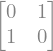

<IPython.core.display.Latex object>

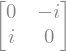

<IPython.core.display.Latex object>

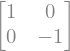

<IPython.core.display.Latex object>

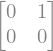

<IPython.core.display.Latex object>

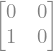

In [9]:
sigma_x = msigma(1)
sigma_y = msigma(2)
sigma_z = msigma(3)
sigma_Plus = (sigma_x + sp.I*sigma_y)/2
sigma_Moins = (sigma_x - sp.I*sigma_y)/2

Latex("$\sigma_x$:")
sigma_x
Latex("$\sigma_y$:")
sigma_y
Latex("$\sigma_z$:")
sigma_z

Latex("$\sigma^+$:")
sigma_Plus
Latex("$\sigma^-$:")
sigma_Moins

<div class="rqE">

**Do not `print` SymPy variables**. `print(SymPy variable)` returns a string form designed to be copied ans pasted.

To display them, just type their name. In a notebook, it will render $\LaTeX$
(if it does not work, use `display` as a backup)

Let's illustrate this in the next cell, to make it clear
</div>

Integral(3*x**2 + 1, x)


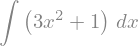

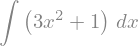

In [10]:
x= sp.Symbol('x')
example = sp.Integral(3*x**2+1)
t4pPC.centerTitle("print(example) returns a string")
print(example)
t4pPC.centerTitle("type 'example' directly to return a pretty display of the integral")
example
t4pPC.centerTitle("'display(example)' also returns a pretty display of the integral")
display(example)

<div class="intro">

Let's now express the two spin states $\alpha$ and $\beta$ in a two-state basis set
</div>

In [11]:
alpha = sp.Matrix([1,0])
beta = sp.Matrix([0,1])
alpha
beta

<div class="exE" title="Comment?">

Comment on the results.

What would be the difference with the next possible matrix forms for $\alpha$ and $\beta$?

(answer in the "comment" mardown cell)

$$\alpha=\left(\begin{array}{c}
\frac{1}{2}\\
\frac{1}{2}
\end{array}\right)\,\,\,\,\,\,\,\,\,\,\,\,\beta=\left(\begin{array}{c}
\frac{1}{2}\\
-\frac{1}{2}
\end{array}\right)$$
</div>

<div class="com">
The new basis vectors are a linear transformation of the old ones, and they are not normalized. This transformation includes a shrinking operation, i.e. changing the norm of the vectors to 1/2 instead of 1 (thus, the new basis set is not normalized); and also a change of the orientation of each vector. This change of orientation can be described in many forms, one would be as follows: rotation of $\alpha$ and $\beta$ 45° counter-clockwise, then inversion center applied only on $\beta$.
</div>

<div class="exE">

Apply the `sigma_Plus` and `sigma_Moins` operators to both `alpha` and `beta`. Comment on the results.
</div>

In [12]:
# Applying sigma+ and sigma- to alpha and beta
alpha_sigma_plus = sigma_Plus*alpha
alpha_sigma_moins = sigma_Moins*alpha

beta_sigma_plus = sigma_Plus*beta
beta_sigma_moins = sigma_Moins*beta

#Printing the results
Latex("$\\sigma^{+}\\left| \\alpha \\right> = 0$")
alpha_sigma_plus
Latex("$\\sigma^{-}\\left| \\alpha \\right> = \\left| \\beta \\right>$")
alpha_sigma_moins
Latex("$\\sigma^{+}\\left| \\beta \\right> = \\left| \\alpha \\right>$")
beta_sigma_plus
Latex("$\\sigma^{-}\\left| \\beta \\right> = 0$")
beta_sigma_moins


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<div class="com">

$\sigma^+\left| \alpha \right>$ gives zero, while $\sigma^-\left| \alpha \right>$ changes $\left| \alpha \right>$ to $\left| \beta \right>$. Likewise for $\beta$, $\sigma^-\left| \beta \right>$ gives zero and $\sigma^{+}\left| \beta \right>$ changes $\left| \beta \right>$ to $\left| \alpha \right>$
</div>

<div class="intro">

We will see later that some equations depend on the identity matrix. There are two ways to return in identity matrix with SymPy. One is the [`eye` method](https://docs.sympy.org/latest/modules/matrices/common.html#sympy.matrices.common.MatrixCommon.eye), that returns an explicit identity matrix, the second one is the [`Identity` function], that returns a symbolic identity matrix. A symbolic matrix expression can be turned into an explicit matrix with the `as_explicit()` method.

Let's illustrate all this with a 3 &times; 3 identity matrix: 

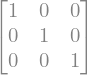

Shape of the Identity matrix I = (3, 3)


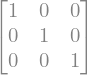

In [13]:
t4pPC.centerTitle("eye method")
I_ = eye(3)
I_

t4pPC.centerTitle("Identity method")
I = Identity(3)
I
print(f"Shape of the Identity matrix {I} = {I.shape}")

I_ = I.as_explicit()
I_

<div class="exE" title="Zeeman energies of a single proton in a magnetic field">

Apply the matrix representation of the Zeeman Hamiltonian,$ \boldsymbol{H}_{\mathrm{Z}}$, to the matrix form of the spin states $\alpha$ and $\beta$. Use a symbolic representation of variables. You should find results reported in equations (10) and (11).

**Hint**:

```python
B0 = sp.Symbol("B0", positive=True, real=True)
gamma_H = sp.Symbol("gamma_H", positive=True, real=True)
hbar = sp.Symbol("hbar", positive=True, real=True)
```
</div>

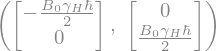

In [14]:
# insert your code here
# Given symbolic variables
B0, gamma_H, hbar = sp.symbols("B0 gamma_H hbar", positive=True, real=True)

# Define spin operators
Iz = sp.Matrix([[1, 0], [0, -1]]) / 2  # Spin operator in the z-direction

# Define Zeeman Hamiltonian
HZ = -gamma_H * hbar * B0 * Iz

# Define spin states
alpha = sp.Matrix([1, 0])
beta = sp.Matrix([0, 1])

# Apply Zeeman Hamiltonian to spin states
alpha_result = HZ @ alpha
beta_result = HZ @ beta

# Display the results
alpha_result, beta_result


### Kronecker products

<div class="intro">

We must use Kronecker products since we will work on matrix representations of operators. For a two-spin system, the Zeeman Hamiltonian is written as

$$\boldsymbol{H}_{\mathrm{Z}}=-\frac{1}{2}\nu_{\mathrm{A}}\boldsymbol{\sigma}_{z_{\mathrm{A}}}\otimes\boldsymbol{\mathrm{1}}-\frac{1}{2}\nu_{\mathrm{B}}\boldsymbol{\mathrm{1}}\otimes\boldsymbol{\sigma}_{z_{\mathrm{B}}}$$

wheras the J-coupling Hamiltonian is formulated as

$$\boldsymbol{H}_{\mathrm{J}}=\frac{1}{4}J_{\mathrm{AB}}(\boldsymbol{\Sigma}_{xx}+\boldsymbol{\Sigma}_{yy}+\boldsymbol{\Sigma}_{zz})$$
</div>

#### Operators for the Zeeman Hamiltonian

<div class="exE" title="Pauli matrix representation in a two-spin system (section 1.5.2)">

1. Define $\boldsymbol{\sigma}_{z_{\mathrm{A}}}\otimes\boldsymbol{\mathrm{1}}$ and $\boldsymbol{\mathrm{1}}\otimes\boldsymbol{\sigma}_{z_{\mathrm{B}}}$ as two new operators `SzA` and `SzB`

2.  Print them out to check that they are correct.
</div>

<IPython.core.display.Latex object>

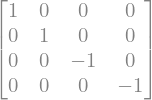

<IPython.core.display.Latex object>

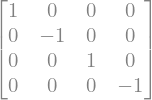

In [33]:
# Given symbolic variables
I = sp.eye(2)  # 2x2 identity matrix
sigma_z = sp.Matrix([[1, 0], [0, -1]])  # Pauli matrix sigma_z, same for nuclei A and B. 

# Define the operators SzA and SzB using Kronecker product
SzA = sp.kronecker_product(sigma_z, I)
SzB = sp.kronecker_product(I, sigma_z)

# Display the results
Latex("$\\sigma_{z_A}$:")
SzA
Latex("$\\sigma_{z_B}$:")
SzB  
#They are consistent with equations 29 and 30 of the technical paper.  

####  Operators for the J-coupling Hamiltonian

<div class="exE" title="Matrix representation of operators of the J-coupling hamiltonian in a two-spin system (section 1.5.2)">

1. Define $\boldsymbol{\Sigma}_{xx}$, $\boldsymbol{\Sigma}_{yy}$ and $\boldsymbol{\Sigma}_{zz}$ as three new operators `Sigma_xx`, `Sigma_yy` and `Sigma_zz`

2.  Display them to check that they are correct.
</div>

<IPython.core.display.Latex object>

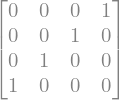

<IPython.core.display.Latex object>

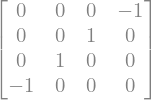

<IPython.core.display.Latex object>

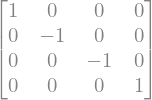

In [16]:
# insert your code here

# Define Pauli matrices for Sigma_xx, Sigma_yy, Sigma_zz
sigma_x = sp.Matrix([[0, 1], [1, 0]])
sigma_y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sigma_z = sp.Matrix([[1, 0], [0, -1]])

# Define the operators Sigma_xx, Sigma_yy, Sigma_zz using Kronecker product
Sigma_xx = sp.kronecker_product(sigma_x, sigma_x)
Sigma_yy = sp.kronecker_product(sigma_y, sigma_y)
Sigma_zz = sp.kronecker_product(sigma_z, sigma_z)

# Display the results. They are consistent with equation 33 of the technical paper.
Latex("$\\Sigma_{xx}$:")
Sigma_xx
Latex("$\\Sigma_{yy}$:")
Sigma_yy
Latex("$\\Sigma_{zz}$:")
Sigma_zz

## Definition and diagonalization of the spin Hamiltonian of an AB system

### Definition of H

#### Zeeman component of the Hamiltonian


<div class="exE" title="Matrix representation of the Zeeman hamiltonian in a two-spin system (section 1.5.2)">

1. Define two symbolic variables `nuA` and `nuB`.

2. Define `Hz`, the symbolic representation of the $\boldsymbol{H}_{\mathrm{Z}}$ Hamiltonian

3. Print it out to check that it is correct (you should find eq. 34)

</div>

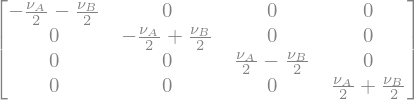

In [17]:
# Define symbolic variables
nuA, nuB, = sp.symbols("nu_A nu_B", real=True)

# Define the Zeeman Hamiltonian Hz using nuA and nuB. Sigma A and Sigma B are defined as the diagonal matrices sp.diag(-nuA, nuA)/2 and sp.diag(-nuB, nuB)/2, which is the result of multiplying sigma z with -nuA/2 and -nuB/2
# Definition according to equation 28 of the technical paper.
Hz = (
    sp.kronecker_product(sp.diag(-nuA, nuA) / 2, sp.eye(2)) +
    sp.kronecker_product(sp.eye(2), sp.diag(-nuB, nuB) / 2)
)

# Display the result
Hz
# It is consistent with equation 34 of the technical paper


#### J-coupling Hamiltonian

<div class="exE" title="Matrix representation of the J-coupling hamiltonian in a two-spin system (section 1.5.2)">

1. Define the symbolic variables `JAB`.

2. Define `HJ`, the symbolic representation of the $\boldsymbol{H}_{\mathrm{J}}$ Hamiltonian

3. Print it out to check that it is correct (you should find eq. 35)
</div>

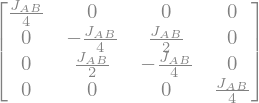

In [18]:
# enter your code here
# Define symbolic variable for JAB
JAB = sp.Symbol("J_{AB}", real=True)

# Define the J-coupling Hamiltonian HJ
HJ = (JAB/4) * (Sigma_xx + Sigma_yy + Sigma_zz)

# Display the result. It is the same as equation 35 in the technical paper.
HJ


#### Total Hamiltonian

<div class="exE">

1. Derive the total hamiltonian, `H`, from the previous results

2. Print it out to check that it is correct (you should find eq. 36)
</div>

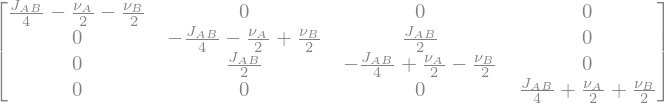

In [19]:
# Define the Total Hamiltonian
H = Hz + HJ

# Display the result
H

<div class="rqT" title="Assumption of inequalities">

There is no way in SymPy to assume inequalities, such as that $\nu_\mathrm{A} < \nu_\mathrm{B}$, because the [(old) assumptions system](https://docs.sympy.org/latest/guides/assumptions.html#the-old-assumptions-system) does not support relations.

**What is the practical consequence?** In our case, it will be that SymPy will not be able to simplify to 1 a relationship of the kind:

$$\frac{\nu_{\mathrm{B}}-\nu_{\mathrm{A}}}{|\nu_{\mathrm{A}}-\nu_{\mathrm{B}}|} \quad \quad \quad, \mathrm{with}\; \nu_\mathrm{A} < \nu_\mathrm{B}$$

It's just annoying because some relationships "simplified" by SymPy will apparently be more complicated than they truly are. You will have to do a "visual check" that simplification should apply to some of these results, such as in orthogonality calculations. 
</div>

### Diagonalization of H

<div class="intro">

The eigenvalues of this Hamiltonian can be obtained by diagonalizing the `H` matrix. They correspond to the energies of the spin states of this AB system, whereas the eigenvectors describe these spin states. Actually, do not forget that the NMR Hamiltonian of had been divided by *h*, so that the energies here are directly calculated in Hz
</div>
<br>
<div class="exE">

1. Find the eigenvalues (`E_funit`) and eigenvectors (`V`) of $\boldsymbol{H}^{\mathrm{NMR}}$, where `E_funit` and `V` are (4,) and (4,4) `sympy.matrices.dense.MutableDenseMatrix`, respectively

2. Print the simplified associated frequency and expression of each eigenstate of $\boldsymbol{H}^{\mathrm{NMR}}$

3. Compare your results with eq. (37)-(40). Apart from the fact that they are not in the same order, what else can you see?

**Hints.**
- The [`sp.Matrix()`](https://docs.sympy.org/latest/modules/matrices/dense.html#sympy.matrices.dense.Matrix) utility could be useful
- The [`M.diagonal()`](https://docs.sympy.org/latest/modules/matrices/common.html#sympy.matrices.common.MatrixCommon.diagonal) code returns as a SymPy vector the diagonal elements of the `M` matrix
</div>

Eigenvectors matrix and eigenvalues of H


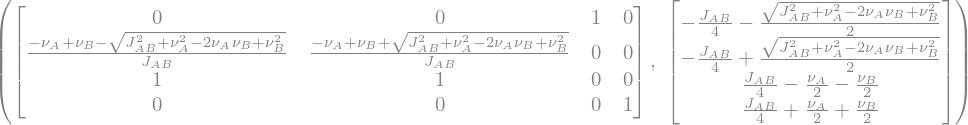

Eigenstate 1:
Frequency:


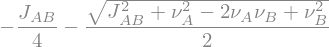

Expression:


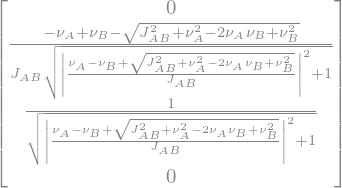


Eigenstate 2:
Frequency:


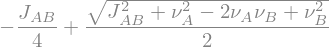

Expression:


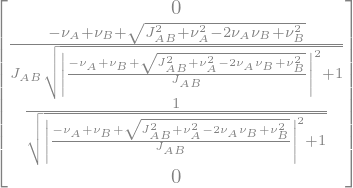


Eigenstate 3:
Frequency:


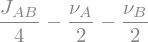

Expression:



Eigenstate 4:
Frequency:


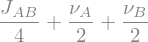

Expression:


In [34]:
# Find eigenvalues and eigenvectors
V, E_funit  = H.diagonalize()

E_funit = E_funit.diagonal().T # Storing the eigenvalues in a vector

# Display the results
print("Eigenvectors matrix and eigenvalues of H")
V, E_funit 

# Initialize an empty list to store normalized eigenvectors
V_norm = []

# Print the simplified associated frequency and expression of each eigenstate
for i in range(4):
    frequency = E_funit[i].simplify()             # Iterate through the 4 elements of E_funit to print the frequencies of each state
    expression = V[:, i].simplify()               # Iterate through the columns of V matrix to find each eigenvector
    magnitude = expression.norm()                 # Calculating magnitude to normalize the vectors
    norm_vector = expression / magnitude          # Normalizing
    V_norm.append(norm_vector)                    # Append normalized vectors to the list V_norm
    print(f"Eigenstate {i + 1}:\nFrequency:")
    frequency
    print("Expression:")
    norm_vector
    print()

# Convert the normalized eigenvector list to a NumPy array
V_norm = np.hstack(V_norm)
V_norm = sp.Matrix(V_norm)  # Convert back to SymPy matrix

<div class="com">
Besides the fact that they are not in the same order, the expressions $(\nu_A-\nu_B)$ are expanded inside the square root, and the first eigenvalue in this matrix has negative signs on both terms, while in the technical paper it has a plus sign on $\dfrac{J_{AB}}4$. Also, eigenvectors 1 and 2 (2 and 3 in the technical paper) are different, as constants a,b,c,d don't appear. Instead, these constants have been calculated by SymPy and we see the algebraic expression. The lowest and highest energy states are 3 and 4, respectively, which correspond to the states $\alpha \alpha$ and $\beta \beta$, respectively. The intermediate states 2 and 3 are $\alpha \beta$ and $\beta \alpha$
</div>

### Sorting of the eigenvalues and eigenvectors

<div class="exE">
    
It is necessary to sort the spin states $V_i$ according to their total spin value, $M$. Values for $M$ can easily be calculated because $V_i$ are also eigenvectors of the $I_z$ operators, the eigenvalues will be on the diagonal of the following ***M*** matrix:

$$\boldsymbol{M} = \frac{1}{2}\left[\boldsymbol{V}^{T}(\boldsymbol{I}_{z_{\mathrm{A}}}\otimes\boldsymbol{1}+\boldsymbol{1}\otimes\boldsymbol{I}_{z\mathrm{_{B}}})\boldsymbol{V}\right]$$

1. Calculate ***M***
2. Sort `E_funit` and `V` by increasing values of *M* (see also Fig. 2 of the technical document)
3. Print the sorted `E_funit` matrix and calculate again ***M*** with the sorted `V` matrix
4. Check that the new `V` basis set is orthonormal. Comment on this result.
</div>

M Matrix:


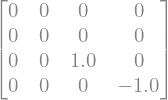

Sorted E


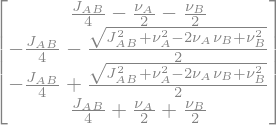

Sorted $V_norm$


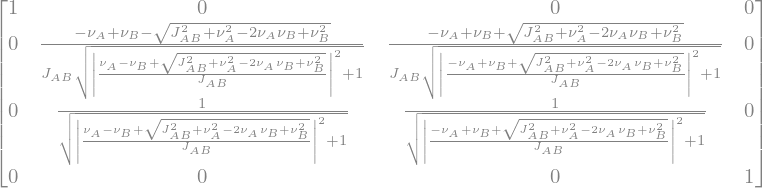

Sorted M matrix:


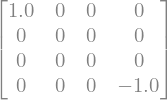

Orthonormality verification


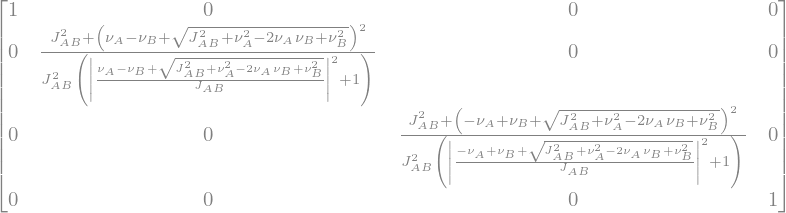

In [35]:
# Define the spin operators I_z^A and I_z^B
IzA = sp.Matrix([[1, 0], [0, -1]])
IzB = sp.Matrix([[1, 0], [0, -1]])

# Calculate the matrix M
M = 1/2 * V.T * (sp.kronecker_product(IzA, sp.eye(2)) + sp.kronecker_product(sp.eye(2), IzB)) * V

# Simplify and display the result
M_simplified = M.simplify()

print("M Matrix:")
M_simplified

# To sort E_funit and V_norm by increasing values of M, we can use the permutations in the matrices, since we know the energy of the states. To permute, SymPy offers the .permute() method
# Vector 3 (index 2) is the lowest in energy and goes to the first position. The first vector (index 0) is second in energy and goes to the second position. Thus, new order: 2,0,1,3
E_sorted = E_funit.permute([2,0,1,3])
V_sorted = V_norm.permute([2,0,1,3], orientation='cols')  #It's a 4x4 matrix so it's needed to specify the orientation of the permutation
print("Sorted E")
E_sorted
print("Sorted $V_norm$")
V_sorted

# Calculate again the matrix M, now with sorted E and V matrices
M_sorted = 1/2 * V_sorted.T * (sp.kronecker_product(IzA, sp.eye(2)) + sp.kronecker_product(sp.eye(2), IzB)) * V_sorted
print("Sorted M matrix:")
M_sorted

# Check if the new V basis set is orthonormal
orthogonal_matrix = V_sorted.T * V_sorted  # Define M.T * M, it should be equal to identity matrix 4x4 if the basis is orthonormal.

orthogonal_matrix_simplified = orthogonal_matrix.applyfunc(lambda x: x.simplify())   #Simplifying the result.

# Display to make visual verification
print("Orthonormality verification")
orthogonal_matrix_simplified

<div class="com">

From matrix M we confirm the state lowest in energy is $\alpha \alpha$, the highest is $\beta \beta$, and $\alpha \beta$, $\beta \alpha$ are intermediate in energy, as expected by Figure 2 of the technical paper. Regarding the orthonormality of the new V basis set, it verifies if $V^T \cdot V = \mathbf{I}$. It does, as the remaining expression for vectors 2 and 3 is equal to 1 but SymPy fails to simplify it completely.
</div>

### Simulation of an AB spectrum

#### Determination of the intensities and energies of the allowed transitions

<div class="exE">

1. Calculate the transition matrix ***T***, that will be named `TM`
2. From this, deduce the intensity matrix ***I***, that will be named `IM`
3. Finally, deduce the frequency matrix ***ν***, that will be named `FM`

</div>

Transition matrix


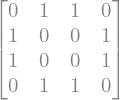

Intensity matrix


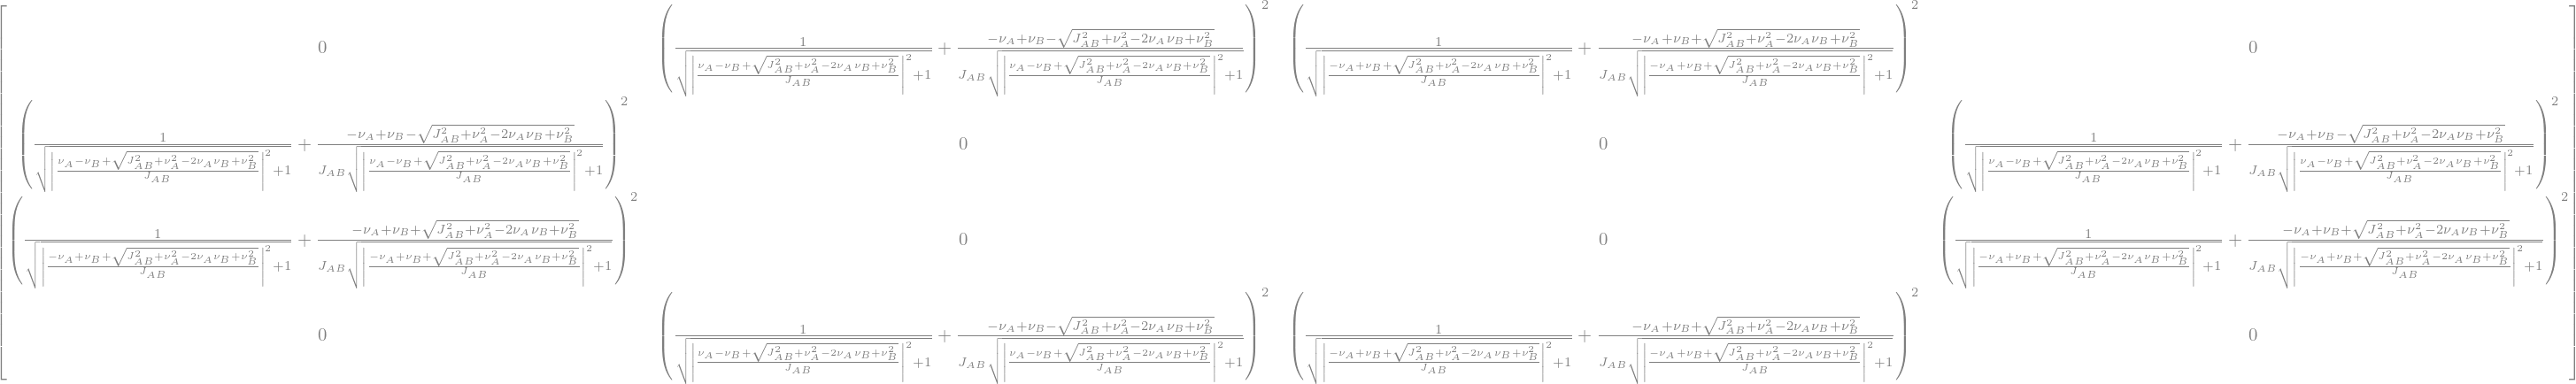

In [36]:
# Define Ixa and Ixb
IxA = sp.Matrix([[0, 1], [1, 0]])
IxB = sp.Matrix([[0, 1], [1, 0]])

#Transition Matrix as defined in eq. 43 of the technical paper.
TM = sp.kronecker_product(IxA, sp.eye(2)) + sp.kronecker_product(sp.eye(2), IxB)

# Display the transition matrix 
print("Transition matrix")
TM

# Intensity Matrix
IM = sp.zeros(4, 4)

# Loop to generate the IM elements and substitute them inside the IM empty matrix just created. 
for i in range(4):
    for j in range(4):
        IM[i,j] = (V_sorted[:,i].transpose() * TM * V_sorted[:,j])**2   #Applying equation 42 of the technical paper

print("Intensity matrix")

IM


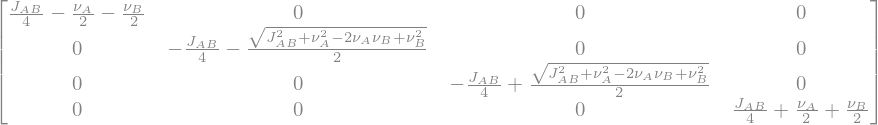

Transition Frequency matrix


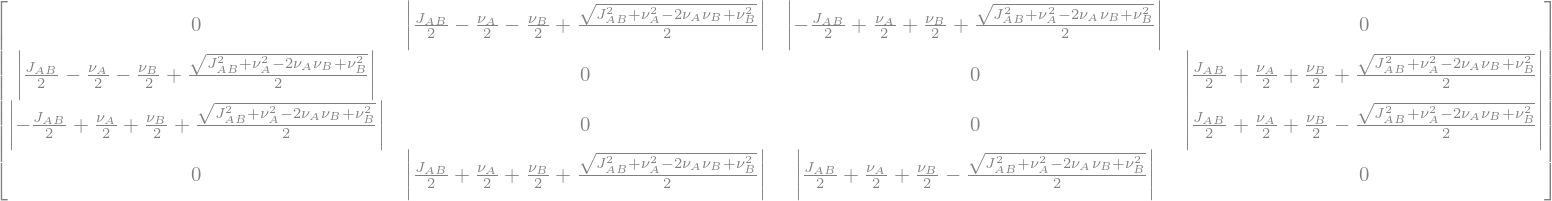

In [37]:
# Frequency Matrix
E_matrix = sp.diag(*E_sorted)  # Create a diagonal matrix using the elements of E_sorted. It's like the diagonal matrix of H but with the right order in the sorting.
E_matrix
FM = abs(E_matrix*TM - TM*E_matrix) # The transition frequency matrix relates the eigenvalues (transition frequencies) and the TM matrix as: FM = E*TM - TM*E

print("Transition Frequency matrix")
FM

#### Case studies

<div class="exE">

- Plot a simulated NMR spectrum as vertical lines, in two cases
    - *&nu;*<sub>A</sub> = 195 Hz, *&nu;*<sub>B</sub> = 205 Hz, *J*<sub>AB</sub> = 7 Hz
    - *&nu;*<sub>A</sub> = 150 Hz, *&nu;*<sub>B</sub> = 250 Hz, *J*<sub>AB</sub> = 7 Hz

The first spectrum should look like: 
<img src="./MiscSavedFiguresVideos/NMR-ABcase-C.png" alt="NMRCase1" width="500" style="display: block; margin: 0 auto; align:center"/>

- Comment on these two plots
</div>

In [54]:
# Function to plot vertical lines of the spectrum, given a list with frequencies and intensities.
def plot_spectrum(ax, frequencies,intensities, title):
    frequencies = np.array(frequencies, dtype=float)  # Generating arrays for frequency and intensity that contain only floats.
    intensities = np.array(intensities, dtype=float)
    
    ax.vlines(frequencies, 0, intensities, colors='r', linestyles='solid')
    ax.set_title(title)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Intensity')
    ax.set_xlim([max(frequencies)+10,min(frequencies)-10])   # x-limit that adjusts to the given frequencies
    ax.set_yticks(np.arange(0, max(intensities) + 0.1, 0.5)) # customizing the yticks
    ax.set_yticklabels([f'{val:.1f}' for val in np.arange(0, max(intensities) + 0.1, 0.5)]) # customizing the yticks labels
    ax.set_ylim([0, max(intensities) + 0.1])   # y-limit that adjusts to the given frequencies



##### nuA = 150 Hz, nuB = 250 Hz, JAB = 7 Hz

Energy matrix Case 1


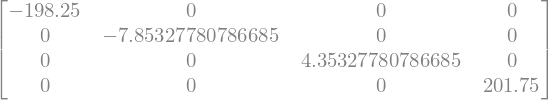

IM Case 1


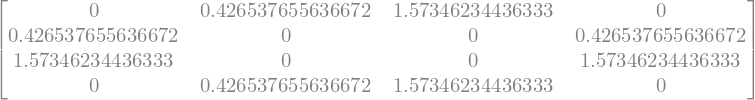

FM Case 1


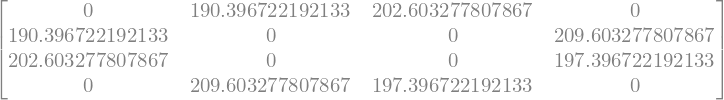

Frequencies to be plotted = [190.396722192133, 202.603277807867, 209.603277807867, 197.396722192133]
Intensities to be plotted = [0.426537655636672, 1.57346234436333, 0.426537655636672, 1.57346234436333]


In [44]:
# CASE 1
numerical_values_1 = {nuA: 195, nuB: 205, JAB: 7}  # given

# Energy matrix
print("Energy matrix Case 1")
num_EM_case1 = E_matrix.subs(numerical_values_1).evalf()   # Evalf to evaluate the numerical result
num_EM_case1

# 1. Define the intensities. They will be taken from the intensity matrix

# Substitute numerical values in the intensity matrix
num_IM_case1 = IM.subs(numerical_values_1).evalf()   # Evalf to evaluate the result
print("IM Case 1")
num_IM_case1

#Create lists with the intensity. They are hand-picked from the intensity matrix.
intensity_case1 = [num_IM_case1[0,1],num_IM_case1[0,2],num_IM_case1[3,1],num_IM_case1[3,2]]

# 2. Define the frequencies. They will be taken from the frequency matrix
# Substitute numerical values in the frequency matrix
num_FM_case1 = FM.subs(numerical_values_1).evalf()   # Evalf to evaluate the result
print("FM Case 1")
num_FM_case1

#Create lists with the frenquencies, picking the desired values from the matrix.
frequency_case1 = [num_FM_case1[0,1],num_FM_case1[0,2],num_FM_case1[3,1],num_FM_case1[3,2]]

print(f"Frequencies to be plotted = {frequency_case1}")
print(f"Intensities to be plotted = {intensity_case1}")

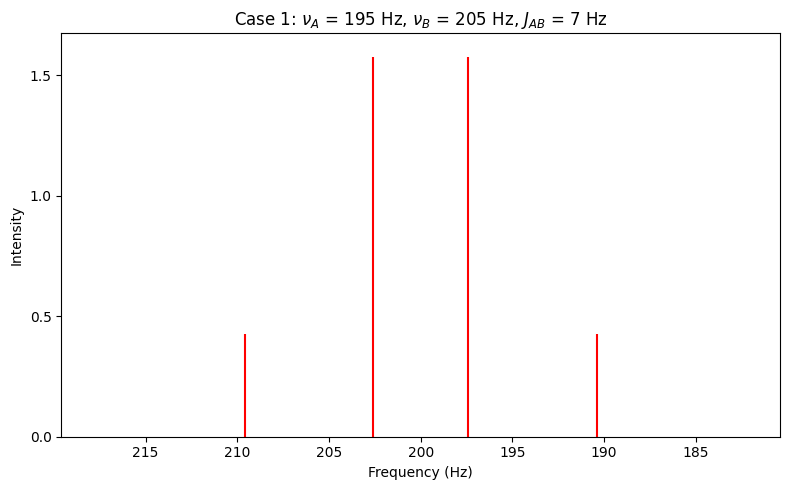

In [55]:
# Applying the plotting function 
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(8, 5))

plot_spectrum(ax1, frequency_case1,intensity_case1, r'Case 1: $\nu_A$ = 195 Hz, $\nu_B$ = 205 Hz, $J_{AB}$ = 7 Hz')

# Show the plot for Case 1
plt.tight_layout()
plt.show()

##### nuA = 195 Hz, nuB = 205 Hz, JAB = 7 Hz

Energy matrix Case 2


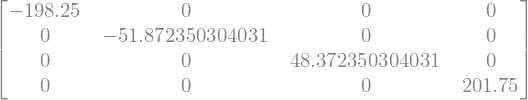

IM Case 2


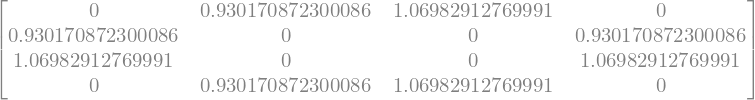

FM case 2


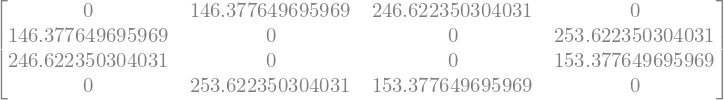

Frequency Case 2: [146.377649695969, 246.622350304031, 253.622350304031, 153.377649695969]
Intensity Case 2: [0.930170872300086, 1.06982912769991, 0.930170872300086, 1.06982912769991]


In [46]:
# CASE 2
numerical_values_2 = {nuA: 150, nuB: 250, JAB: 7}

# Energy matrix
print("Energy matrix Case 2")
num_EM_case2 = E_matrix.subs(numerical_values_2).evalf()   # Evalf to evaluate the result
num_EM_case2

# 1. Define the intensities. They will be taken from the intensity matrix
# Substitute numerical values in the intensity matrix
num_IM_case2 = IM.subs(numerical_values_2).evalf()   # Evalf to evaluate the result
print("IM Case 2")
num_IM_case2

#Create lists with the intensity
intensity_case2 = [num_IM_case2[0,1],num_IM_case2[0,2],num_IM_case2[3,1],num_IM_case2[3,2]]


# 2. Define the frequencies. They will be taken from the frequency matrix
# Substitute numerical values in the frequency matrix
num_FM_case2 = FM.subs(numerical_values_2).evalf()   # Evalf to evaluate the result
print("FM case 2")
num_FM_case2

#Create lists with the intensity
frequency_case2 = [num_FM_case2[0,1],num_FM_case2[0,2],num_FM_case2[1,3],num_FM_case2[2,3]]

print("Frequency Case 2:", frequency_case2)
print("Intensity Case 2:", intensity_case2)

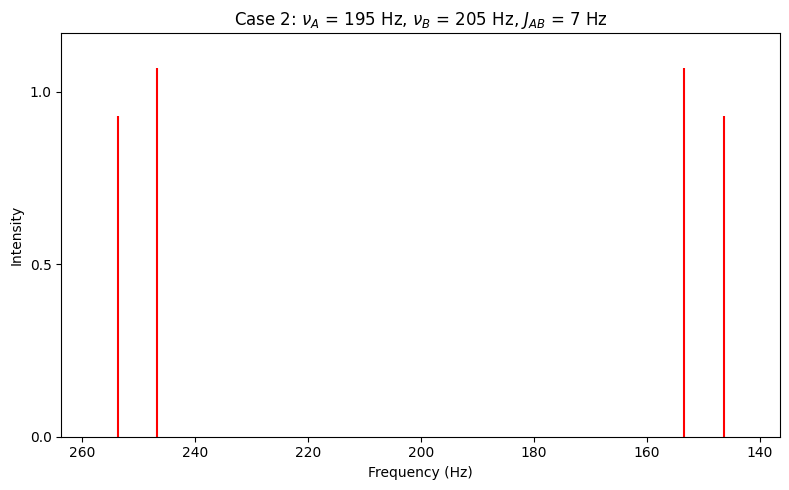

In [56]:
# Applying the plotting function 
fig, ax2 = plt.subplots(figsize=(8, 5))

plot_spectrum(ax2, frequency_case2,intensity_case2, r'Case 2: $\nu_A$ = 195 Hz, $\nu_B$ = 205 Hz, $J_{AB}$ = 7 Hz')

# Show the plot for Case 2
plt.tight_layout()
plt.show()

<div class="com">

After finding the transition frequency matrix and the intensity matrix it is possible to find all the information to simulate an NMR spectrum, given the frequencies $\nu_A$ and $\nu_B$, as well as the coupling constant, because these values allow us to assign numerical values in all matrices. The obtained spectrum for case 1 is in agreement with the expected one presented in the image. 
</div>

##### Simulation of an AB spectrum at 60 MHz

<div class="exE">
The goal of this new exercise is to simulate the AB part of the experimental 1H-NMR spectrum of 3,6-dimethyl-2-nitroaniline, obtained on a 60 Mhz spectrometer:

<figure>
  <img width="500px" src="./MiscImages/1HNMR-3,6-dimethyl-2-nitroaniline.jpg" style="margin-left:auto; margin-right:auto" id="imgNMRaniline_exp"/>
  <figcaption><b>Experimental 1H-NMR spectrum of 3,6-dimethyl-2-nitroaniline, measured on a 60 MHz spectrometer</b><br>(<i>spectrum taken from:</i> H. Günther, NMR Spectroscopy: Basic Principles, Concepts, and Applications in Chemistry, Wiley, 2013)</figcaption>
</figure>
<br>

The *&delta;*<sub>A</sub> and *&delta;*<sub>B</sub> chemical shifts and the *J*<sub>AB</sub> coupling constant can be inferred from the spectrum:
- *&delta;*<sub>A</sub> = 6.3 ppm
- *&delta;*<sub>B</sub> = 6.8 ppm
- *J*<sub>AB</sub> = 10 Hz

1. Calculate the absolute resonance frequencies of protons H<sup>*a*</sup> and H<sup>*b*</sup>, as well as their frequencies relative to TMS
2. Use these parameters with the developed AB NMR Hamiltonian to calculate and plot the simulated AB part of the 1H NMR spectrum of 3,6-dimethyl-2-nitroaniline. How does it compare with its experimental counterpart ?

**Optional question.** Plot the simulated NMR spectrum with two axis that share the same x-axis: one related to chemical shifts, the second one to the corresponding relative resonance frequencies. And sum the signals with Lorentzian functions. It should look like:

<figure>
  <img width="500px" src="./MiscSavedFiguresVideos/3_6-dimethyl-2-nitroaniline-NMRSpectrum-C.png" style="margin-left:auto; margin-right:auto" id="imgNMRaniline_simul"/>
  <figcaption><b>Simulated 60 MHz 1H-NMR spectrum of 3,6-dimethyl-2-nitroaniline</b></figcaption>
</figure>
 
</div>

Relative Resonance Frequency of Ha: 378.00 Hz
Relative Resonance Frequency of Hb: 408.00 Hz
Absolute Resonance Frequency of Ha: 60.000378 Hz
Absolute Resonance Frequency of Hb: 60.000408 Hz
Energy matrix


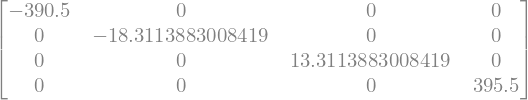

IM


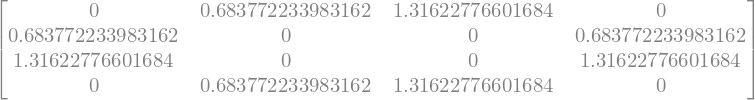

FM


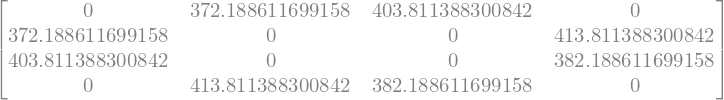

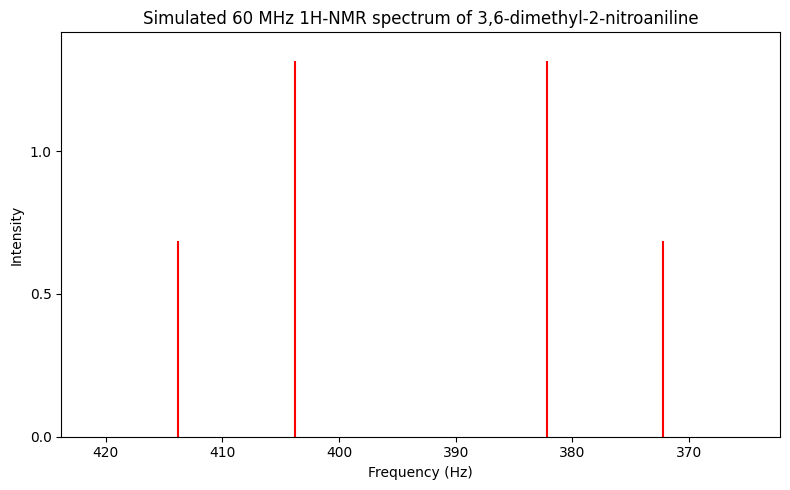

In [48]:
%matplotlib inline

# Given values
delta_A = 6.3  # Chemical shift of proton Ha in ppm
delta_B = 6.8  # Chemical shift of proton Hb in ppm
JAB_ = 10      # Coupling constant in Hz
nu_spectrometer = 60  # Spectrometer frequency in MHz

# Relative resonance frequencies in Hz. We apply our functions defined in one of the first exercises
nu_Ha = nu_i_rel(delta_A, nu_spectrometer * 1e6)
nu_Hb = nu_i_rel(delta_B, nu_spectrometer * 1e6)

# Absolute resonance frequencies in Hz. We apply our functions defined in one of the first exercises
nu_rel_Ha = nu_i(delta_A, nu_spectrometer * 1e6) 
nu_rel_Hb = nu_i(delta_B, nu_spectrometer * 1e6) 

# Display the results
print(f"Relative Resonance Frequency of Ha: {nu_Ha:.2f} Hz")
print(f"Relative Resonance Frequency of Hb: {nu_Hb:.2f} Hz")
print(f"Absolute Resonance Frequency of Ha: {nu_rel_Ha:.6f} Hz")
print(f"Absolute Resonance Frequency of Hb: {nu_rel_Hb:.6f} Hz")

# We can proceed just as in the last exercise
# Assign numerical values to substitute symbolic variables in our matrices
numerical_values = {nuA: 378, nuB: 408, JAB: 10}

# Energy matrix
print("Energy matrix")
num_EM = E_matrix.subs(numerical_values).evalf()   # Evalf to evaluate the result
num_EM

# 1. Define the intensities. They will be taken from the intensity matrix
# Substitute numerical values in the intensity matrix
num_IM = IM.subs(numerical_values).evalf()   # Evalf to evaluate the result
print("IM")
num_IM

#Create lists with the intensity
intensities_ = [num_IM[0,1],num_IM[0,2],num_IM[3,1],num_IM[3,2]]


# 2. Define the frequencies. They will be taken from the frequency matrix
# Substitute numerical values in the frequency matrix
num_FM = FM.subs(numerical_values).evalf()   # Evalf to evaluate the result
print("FM")
num_FM

#Create lists with the intensity
frequencies_ = [num_FM[0,1],num_FM[0,2],num_FM[3,1],num_FM[3,2]]

# Applying the plotting function 
fig, ax3 = plt.subplots(figsize=(8, 5))
plot_spectrum(ax3, frequencies_,intensities_, 'Simulated 60 MHz 1H-NMR spectrum of 3,6-dimethyl-2-nitroaniline')

# Show the plot for Case 2
plt.tight_layout()
plt.show()

Chemical shifts (ppm) to plot :
[6.20314353 6.73018981 6.89685647 6.36981019]


Text(0.5, 0, 'Relative Frequency $\\nu$ (Hz)')

Text(0, 0.5, 'Intensity')

[Text(372.1886116991581, 1, '6.2 ppm'),
 Text(403.8113883008419, 1, '6.7 ppm'),
 Text(413.8113883008419, 1, '6.9 ppm'),
 Text(382.1886116991581, 1, '6.4 ppm')]

Text(0.5, 0, 'Chemical Shift $\\delta$ (ppm)')

Text(0.5, 1.0, '$\\nu_0$ = 60.00 MHz, $\\nu_A$ = 378.00 Hz, $\\nu_B =$ 408.00 Hz, $J_{AB}$ = 10.0 Hz')

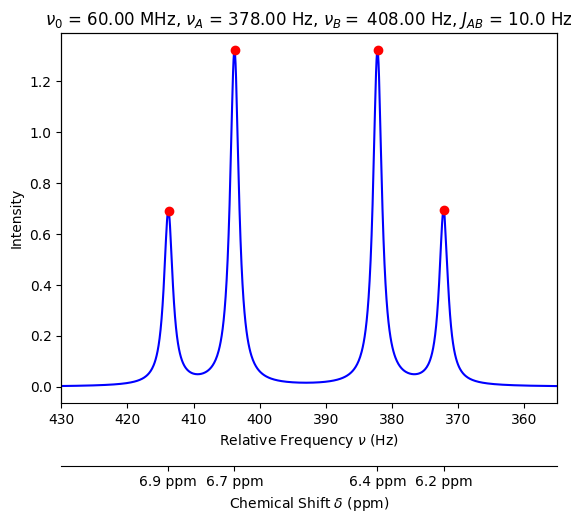

In [49]:
#Optional part
from scipy.signal import find_peaks

#Transform the frequencies list to chemical shift to create the second axis.
frequencies_ = np.array(frequencies_, dtype=float)   # Ensuring that all data type are float
intensities_ = np.array(intensities_, dtype=float)   # Ensuring that all data type are float
frequencies_ = frequencies_.tolist()                 # Transforming back to a list with only floats
intensities_ = intensities_.tolist()                 # Transforming back to a list with only floats

delta = []  #empty list to store the chemical shifts
# Loop to transform all the frequencies to chemical shift
for i in frequencies_:
    chem_shifts = delta_i_rel(i, nu_spectrometer*1e6)  #Function to convert relative freq to chem shift, defined at the beginning of the notebook
    delta.append(chem_shifts)

delta_array = np.array(delta)  # array with the chemical shifts
print("Chemical shifts (ppm) to plot :")
print(delta_array)


# Function to calculate the Lorentzian line shape
def lorentzian(x, x0, gamma, A):
    return A * gamma**2 / ((x - x0)**2 + gamma**2)   #Lorentzian function

# Frequency range
frequency_range = np.linspace(355, 430, 1000)  # Adjust the range near the frequencies observed for both protons


# Simulate the spectrum using Lorentzian functions
spectrum = np.zeros_like(frequency_range)
for i in range(len(intensities_)):
    spectrum += lorentzian(frequency_range, frequencies_[i], 0.8, intensities_[i])  #Applying the Lorentzian function to the freqs and intensities calculated for the spectrum

# Find peaks in the spectrum to highlight them later 
peaks, _ = find_peaks(spectrum, height=0.1)  

# Plotting
fig, ax1 = plt.subplots()

# Plot on the first axis, using relative frequencies
ax1.plot(frequency_range, spectrum,  color='blue')
ax1.set_xlabel(r'Relative Frequency $\nu$ (Hz)')
ax1.set_xlim(430,355)
#ax1.set_xticks(frequencies_)
#ax1.set_xticklabels([f'{freq:.1f} Hz' for freq in frequencies_])
ax1.set_ylabel('Intensity')

# Create a second x-axis for chemical shifts
ax2 = ax1.twiny()

# Set the ticks and labels for the second x-axis
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(frequencies_)
ax2.set_xticklabels([f'{delta:.1f} ppm' for delta in delta_array])

# Set the position below the first axis
ax2.spines['bottom'].set_position(('axes', -0.17)) # Set the position of the bottom spine of ax2 below the axes by -0.17 units
ax2.xaxis.set_ticks_position('bottom')             # Set the ticks for ax2 to be displayed at the bottom
ax2.xaxis.set_label_position('bottom')             # Set the label of ax2 to be displayed at the bottom

# Set the label for the second x-axis
ax2.set_xlabel(r'Chemical Shift $\delta$ (ppm)')

# Mark peaks on the plot
ax1.plot(frequency_range[peaks], spectrum[peaks], 'ro', label='Peaks')   #Highlighting the peaks in the specta

plt.title(r'$\nu_0$ = 60.00 MHz, $\nu_A$ = 378.00 Hz, $\nu_B =$ 408.00 Hz, $J_{AB}$ = 10.0 Hz')
plt.show()

<div class="com">

Comparing this simulated spectrum with its experimental counterpart, we can see the general shape, intensity and position of the peaks are in good agreement. Further detailed inspection can be made by overlapping both spectra, as done in the following picture, where the blue line is the simulated spectrum and the black line is the experimental one.
</div>

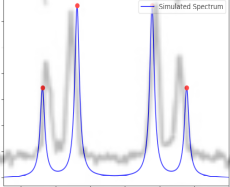

<div class="com">
There seems to be a slight difference in the symmetry of the peaks (the simulated is perfectly symmetrical) and the position of chemical shift, alongside the presence of background noise. The limitation of the simulated spectrum is that it's made from only one molecule, so it fails to consider the potential influence of additional molecules, from the compound or solvent, as well as the impact of temperature and other experimental variables that could affect the shape and position of the peaks. 
</div>

<div class="exE">

The same case has been simulated between *&nu;*<sub>0</sub> = 60 MHz and *&nu;*<sub>0</sub> = 800 MHz

Run the cell below to load an animated plot. Comment on what you observe.
</div>

In [31]:
from IPython import display 
with open("./MiscSavedFiguresVideos/AB2AXsaved.html", "r") as f:
    video = f.read()
html = display.HTML(video) 
display.display(html) 

<div class="com">
The animation shows that as $\nu_o$ increases, the corresponding frequency of peak occurrence also increases. It also looks like the separation between peaks (i.e. coupling constant) becomes shorter, but it is only a result of the change in scale, as the $J$ remains always the same. Additionally, the chemical shift and the difference between $\delta_A$ and $\delta_B$, remain the same for all different values of $\nu_0$. Regarding the intensities, even though they do change, the change is very small in comparison to that of the frequencies. 
</div>

In [32]:
vID.end(cwd0)

**End at:** Friday 19 January 2024, 16:37:27  
**Duration:** 00:00:20 363ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>